# 0) - Settings, Data, Functions

## Setting Environment

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Working Directory
data_path_ = '/content/drive/My Drive/INF-Projet/' # Drive is mounted

In [0]:
#load the packages
from io import open
import os, string, random, time, math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
plt.style.use("seaborn")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from IPython.display import clear_output

#instantiates the device to be used as GPU/CPU 
device_gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
device_gpu

device(type='cpu')

## Cleaning Data
 

In [0]:
# Read data
data = pd.read_csv(data_path_+'name2lang2.txt', sep=', ', engine = 'python')
data.head(2)

,Name,Language
0,Abreu,Portuguese
1,Albuquerque,Portuguese


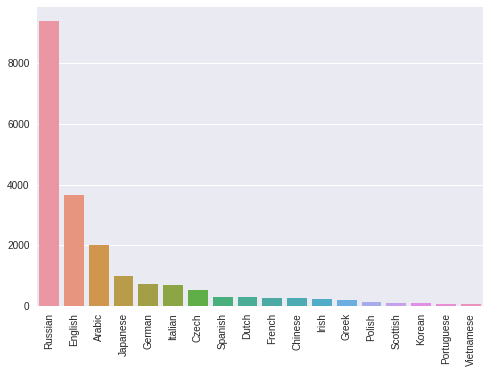

In [0]:
# Repartition actuelle
a=data['Language'].value_counts()
a0 = a
plt_ = sns.barplot(list(a.keys()), list(a.values))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

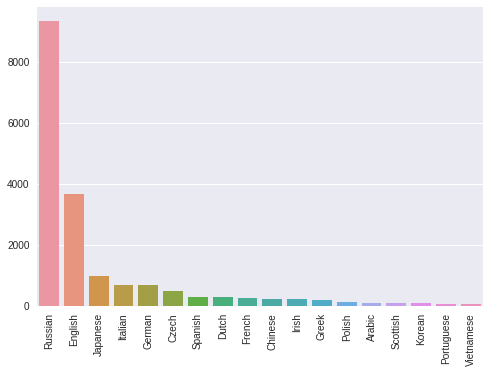

In [0]:
# Enleve les doublons (dans meme Language)
data.drop_duplicates(subset=['Name','Language'],inplace=True)
a=data['Language'].value_counts()
a1=a
plt_ = sns.barplot(list(a.keys()), list(a.values))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

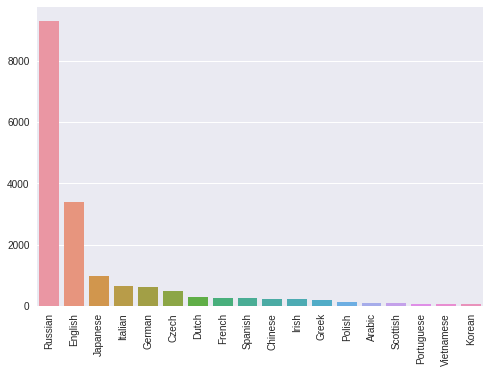

In [0]:
# Enleve les doublons (meme noms dans plusieurs Languages)
data.drop_duplicates(subset=['Name'],inplace=True)
a=data['Language'].value_counts()
a2=a
plt_ = sns.barplot(list(a.keys()), list(a.values))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

In [0]:
# Balancing the labels :
MAX_exemples = 400
for language in list(a.keys()):
  df = data[data['Language']==language]
  size = df.shape[0]
  if size > MAX_exemples :
    index=np.random.choice(list(df.index),size=size-MAX_exemples,replace=False)
    data=data.drop(index,axis=0)

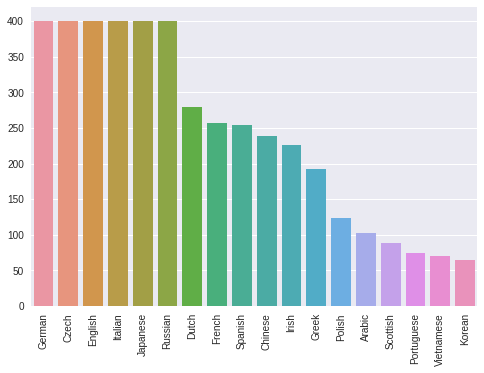

In [0]:
a=data['Language'].value_counts()
a3=a
plt_ = sns.barplot(list(a.keys()), list(a.values))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

In [0]:
df_doublons=pd.concat([a0,a1,a2,a3],axis=1,keys='Language')
df_doublons.columns = ['original','Doublons1','Doublons2','Balancing']
df_doublons.transpose()

,Russian,English,Arabic,Japanese,German,Italian,Czech,Spanish,Dutch,French,Chinese,Irish,Greek,Polish,Scottish,Korean,Portuguese,Vietnamese
original,9384,3668,2000,991,724,709,519,298,297,277,268,232,203,139,100,94,74,73
Doublons1,9340,3668,108,990,690,701,502,293,286,273,246,226,193,138,100,94,74,71
Doublons2,9289,3381,103,987,626,660,502,255,280,257,239,226,193,124,89,65,74,71
Balancing,400,400,103,400,400,400,400,255,280,257,239,226,193,124,89,65,74,71


In [0]:
#Changing Working Directory
data_path_ = '/content/drive/My Drive/INF-Projet/Balanced/' 

In [0]:
# Saving the df to .csv
data.to_csv(data_path_+"name2lang2-balanced.csv", index=False, encoding='utf8')
data.to_csv(data_path_+"name2lang2-balanced-no_header.csv", index=False, encoding='utf8',header=False)

## Pre-Processing

In [0]:
#load the data
languages = []
data = []
X = []
y = []

with open(data_path_+'name2lang2-balanced-no_header.csv', 'r') as f:
    for line in f:
        line = line.split(",")
        name = line[0].strip()
        lang = line[1].strip()
        if not lang in languages:
            languages.append(lang)
        X.append(name)
        y.append(lang)
        data.append((name, lang))

#number of languages
n_languages = len(languages)
print("Total number of languages present: ", n_languages)

Total number of languages present:  18


In [0]:
#print the languages
print(languages)
print(data[:10])

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']
[('Abreu', 'Portuguese'), ('Albuquerque', 'Portuguese'), ('Almeida', 'Portuguese'), ('Alves', 'Portuguese'), ('Araujo', 'Portuguese'), ('Araullo', 'Portuguese'), ('Barros', 'Portuguese'), ('Basurto', 'Portuguese'), ('Belo', 'Portuguese'), ('Cabral', 'Portuguese')]


## Train Test Split

In [0]:
#Split the data : 70% train, 15% valid, 15% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, stratify = y)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 123, stratify = y_test)


In [0]:
# Sizes of data sets
total_size = len(X_train) + len(X_valid) + len(X_test)
print('Size of  X_train :', len(X_train), '   Percentage of the total data set: ', 100*len(X_train)/total_size)
print('Size of X_valid :', len(X_valid),'   Percentage of the total data set: ', np.round(100*len(X_valid)/total_size))
print('Size of X_test :', len(X_test),'   Percentage of the total data set: ', np.round(100*len(X_test)/total_size))

Size of  X_train : 3063    Percentage of the total data set:  69.99542961608775
Size of X_valid : 656    Percentage of the total data set:  15.0
Size of X_test : 657    Percentage of the total data set:  15.0


## Encoding Names and Languages

In [0]:
#get all the letters used for encoding
all_letters = string.ascii_letters + ".,;"
#count the number of letters
n_letters = len(all_letters)

print(n_letters)

55


In [0]:
#function to create representation of the name into tensor
def name_rep(name):
    rep = torch.zeros(len(name), 1, n_letters) #Create a zeros tensor
    #iterate through all the characters in the name
    for index, letter in enumerate(name):
        pos = all_letters.find(letter)
        rep[index][0][pos] = 1 #Assign a value for each pos value
    return rep

In [0]:
#function to create vec representation of the language
def lang_rep(lang):
    return torch.tensor([languages.index(lang)], dtype = torch.long)

In [0]:
#example of name representation
name_rep("Medicis")

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]],

        [[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [0]:
#example of language representation
lang_rep("Italian")

tensor([17])

## Visualization 
- Basic Visualization of labels

In [0]:
count = {}
for l in languages: 
    count[l] = 0
for d in data:
    count[d[1]] += 1

In [0]:
print(count)

{'Portuguese': 74, 'Irish': 226, 'Spanish': 255, 'Vietnamese': 71, 'Chinese': 239, 'Greek': 193, 'Czech': 400, 'Dutch': 280, 'Japanese': 400, 'French': 257, 'German': 400, 'Scottish': 89, 'English': 400, 'Russian': 400, 'Polish': 124, 'Arabic': 103, 'Korean': 65, 'Italian': 400}


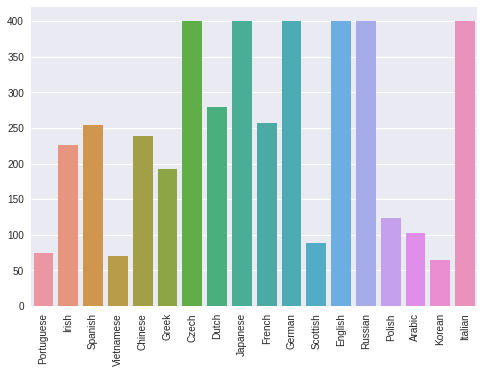

In [0]:
#plot the distribution of labels

plt_ = sns.barplot(list(count.keys()), list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

## Standard RNN

In [0]:
#create simple rnn network 
class RNN_net(nn.Module):
    #Create a constructor
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_net, self).__init__()
        self.hidden_size = hidden_size 
        self.rnn_cell = nn.RNN(input_size, hidden_size)
        self.h20 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim = 1)

    #create a forward pass function
    def forward(self, input_, hidden = None, batch_size = 1):
        out, hidden = self.rnn_cell(input_, hidden)
        output = self.h20(hidden.view(-1, self.hidden_size))
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self, batch_size = 1):
        #function to init the hidden layers
        return torch.zeros(1, batch_size, self.hidden_size)

In [0]:
#function to run Inference ->return prediction tensor
def infer(net, name, device = "cpu"):
    name_ohe = name_rep(name).to(device)

    #get the output
    output, hidden = net(name_ohe)

    if type(hidden) is tuple: #for lSTM
        hidden = hidden[0]
    index = torch.argmax(hidden)

    return output

In [0]:
#create hidden layers
n_hidden = 128 #hidden layers count

#initialize the network
net = RNN_net(input_size=n_letters, hidden_size=n_hidden, output_size=n_languages)

In [0]:
#check for inference
output = infer(net, "Tocco", device_gpu)
print(output)
val, indice = output.topk(3)
print('Class predicted :', indice, '\nNLL = ', val)

tensor([[-2.8850, -2.9582, -2.8834, -2.8348, -2.8289, -2.8666, -2.8898, -2.9412,
         -2.8031, -2.9590, -2.9514, -2.9939, -2.8850, -2.9813, -2.9402, -2.9129,
         -2.7643, -2.7874]], grad_fn=<LogSoftmaxBackward>)
Class predicted : tensor([[16, 17,  8]]) 
NLL =  tensor([[-2.7643, -2.7874, -2.8031]], grad_fn=<TopkBackward>)


## Evaluate Model
- Check the model working before training

In [0]:
def dataloader(npoints, X_, y_):
    """Function to load the data. Draw npoints data at random from X and y,or load all dataset"""
    to_ret = []
    # Load all dataset
    if npoints == len(X_):
        for i in range(npoints):
            name, lang = X_[i], y_[i] #subset the data
            to_ret.append((name, lang, name_rep(name), lang_rep(lang)))
    # Else : Draw npoints data at random from X and y
    else :
        for i in range(npoints):
            index_ = np.random.randint(len(X_))
            name, lang = X_[index_], y_[index_] #subset the data
            to_ret.append((name, lang, name_rep(name), lang_rep(lang)))
    
    return to_ret

In [0]:
#loading dataloader
dataloader(2, X_train, y_train)

[('Sze',
  'Chinese',
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0.]]]),
  tensor([4])),
 ('Shakhin',
  'Russian',
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0.

In [0]:
#create an evaluation function 
def eval(net, n_points, topk, X_, y_, device = "cpu"):
    '''Evaluation function : return accuracy for n_points data drawn at random 
    n_points = nombre lines to load
    topk = counted as correct if true label is in the topk first prediction
    X_ = the data, y_ = the labels
    device = cpu or gpu (if GPU acceleration is available)'''
    net = net.eval().to(device)
    criterion = nn.NLLLoss()
    data_ = dataloader(n_points, X_, y_)
    correct = 0
    loss = 0
    #Iterate
    with torch.no_grad(): # No need to autograd since no training : speed up
        for name, language, name_ohe, lang_rep in data_:
            #get the output
            output = infer(net, name, device)
            val, indices = output.topk(topk) #get the top k values
            indices = indices.to(device) #convert to device
            # Accuracy contribution
            if lang_rep in indices:
                correct += 1
            # Loss contribution
            loss += criterion(output, lang_rep).item()
    loss = loss/n_points
    accuracy = correct/n_points
    return accuracy, loss

In [0]:
#test the evaluation function
eval(net, 2000,1, X_valid, y_valid)

(0.0655, 2.9033978933095934)

## Batching in Pytorch

In [0]:
#create a batched name rep
def batched_name_rep(names, max_word_size):
    rep = torch.zeros(max_word_size, len(names), n_letters)
    for name_index, name in enumerate(names):
        for letter_index, letter in enumerate(name):
            pos = all_letters.find(letter)
            rep[letter_index][name_index][pos] = 1
    return rep

In [0]:
#function to print the output
def print_char(name_reps):
    name_reps = name_reps.view((-1, name_reps.size()[-1]))
    for t in name_reps: 
        if torch.sum(t) == 0:
            print('<pad>')
        else:
            index = t.argmax()
            print(all_letters[index])

In [0]:
#example of batching
out_ = batched_name_rep(['Shyam', 'Ram'], 5)
print_char(out_)

S
R
h
a
y
m
a
<pad>
m
<pad>


In [0]:
def batched_lang_rep(langs):
    rep = torch.zeros([len(langs)], dtype=torch.long)
    for index, lang in enumerate(langs):
        rep[index] = languages.index(lang)
    return rep

In [0]:
#create dataloader
def batched_dataloader(npoints, X_, y_, verbose=False, device = 'cpu'):
    names = []
    langs = []
    X_lengths = []
    
    for i in range(npoints):
        index_ = np.random.randint(len(X_))
        name, lang = X_[index_], y_[index_]
        X_lengths.append(len(name))
        names.append(name)
        langs.append(lang)
    max_length = max(X_lengths)
    
    names_rep = batched_name_rep(names, max_length).to(device)
    langs_rep = batched_lang_rep(langs).to(device)
    
    padded_names_rep = torch.nn.utils.rnn.pack_padded_sequence(names_rep, X_lengths, enforce_sorted = False)
    
    if verbose:
        print(names_rep.shape, padded_names_rep.data.shape)
        print('--')
    
    if verbose:
        print(names)
        print_char(names_rep)
        print('--')
    
    if verbose:
        print_char(padded_names_rep.data)
        print('Lang Rep', langs_rep.data)
        print('Batch sizes', padded_names_rep.batch_sizes)
    
    
    return padded_names_rep.to(device), langs_rep

In [0]:
batched_dataloader(2, X_train, y_train, True)

torch.Size([10, 2, 55]) torch.Size([18, 55])
--
['Ichihara', 'Christakos']
I
C
c
h
h
r
i
i
h
s
a
t
r
a
a
k
<pad>
o
<pad>
s
--
C
I
h
c
r
h
i
i
s
h
t
a
a
r
k
a
o
s
Lang Rep tensor([8, 5])
Batch sizes tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 1])


(PackedSequence(data=tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0

## Training Setup

In [0]:
#basic train function
def train(net, opt, criterion, n_points):
    
    opt.zero_grad()
    total_loss = 0
    
    data_ = dataloader(n_points, X_train, y_train)
    
    total_loss = 0
    
    for name, language, name_ohe, lang_rep in data_:

        hidden = net.init_hidden()

        for i in range(name_ohe.size()[0]):
            output, hidden = net(name_ohe[i:i+1], hidden)
            
        loss = criterion(output, lang_rep)
        loss.backward(retain_graph=True)
        
        total_loss += loss
        
    opt.step()       
    return total_loss/n_points

In [0]:
#define parameters
net = RNN_net(n_letters, n_hidden, n_languages)
criterion = nn.NLLLoss()
opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [0]:
#parameters for batch training
net = RNN_net(n_letters, n_hidden, n_languages)
criterion = nn.NLLLoss()
opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [0]:
def train_batch(net, opt, criterion, n_points, device = 'cpu'):
    
    net.train().to(device)
    opt.zero_grad()
    # Load une mini-batch pour le train
    batch_input, batch_groundtruth = batched_dataloader(n_points, X_train, y_train, False, device)
    # Forward through NeuralNel
    output, hidden = net(batch_input)
    # Loss computation
    loss = criterion(output, batch_groundtruth)
    # Retro Prop
    loss.backward()
    # Optimisation Step : Update Weights
    opt.step()
    return loss

In [0]:
%%time 
#time for normal training
train(net, opt, criterion, 256)

CPU times: user 589 ms, sys: 21.4 ms, total: 611 ms
Wall time: 631 ms


tensor(2.8873, grad_fn=<DivBackward0>)

In [0]:
%%time 
#batch training
train_batch(net, opt, criterion, 256)

CPU times: user 42.6 ms, sys: 5.94 ms, total: 48.5 ms
Wall time: 81.2 ms


tensor(2.7677, grad_fn=<NllLossBackward>)

## Full training setup

In [0]:
def train_setup(net, lr = 0.01, n_batches = 100, batch_size = 10, momentum = 0.9, display_freq=None, device = 'cpu', printer=True):
    ''' Return results_dico : Listes des accuracies et losses au fil entrainement
        Return best_model_dico : Save du meilleur modele de l'entrainement'''
    net = net.to(device)
    criterion = nn.NLLLoss()
    opt = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
    if display_freq == None : #Pour save results a chaque epoch environ
        display_freq = np.ceil(len(X_train)/batch_size)
    
    best_accur = 0
    loss_train1 = np.zeros(n_batches + 1)
    losses_train, losses_valid = [],[]
    accuracies_top1_train, accuracies_top1_valid = [],[]
    accuracies_top2_train, accuracies_top2_valid = [],[]
    
    
    for i in range(n_batches):
        # Maj de la loss : (loss*i + newloss)/(i+1)
        loss_train1[i+1] = (loss_train1[i]*i + train_batch(net, opt, criterion, batch_size, device))/(i + 1)
        # Plot tous les display freq batchs
        if i%display_freq == display_freq-1:
            # Nbr Epochs done OR nbr values saved in list (any case : times we entered the if)
            nb_epoch = len(losses_train) + 1
            # Save accuracies + losses
            accur_,loss_ = eval(net, len(X_train), 1, X_train, y_train, device)
            accuracies_top1_train.append(accur_)
            losses_train.append(loss_)
            
            accur_,loss_ = eval(net, len(X_train), 2, X_train, y_train, device)
            accuracies_top2_train.append(accur_)
            
            accur_,loss_ = eval(net, len(X_valid), 2, X_valid, y_valid, device)
            accuracies_top2_valid.append(accur_)

            accur_,loss_ = eval(net, len(X_valid), 1, X_valid, y_valid, device)
            accuracies_top1_valid.append(accur_)
            losses_valid.append(loss_)
            # Saving Best Model : based on accuracy Valid set
            if accur_ > best_accur :
              best_model_dico = {'epoch':nb_epoch, 'model_state_dict':net.state_dict(), 'optimizer_state_dict':opt.state_dict(),
                                 'loss_train':losses_train[-1], 'loss_valid':losses_valid[-1],
                                 'accuracy_train': accuracies_top1_train[-1] ,'accuracy_valid': accuracies_top1_valid[-1]}
              best_accur = accur_
              if printer : print('Best_model Update')
            
            if printer :
              print(' Iteration : ', i,'   Epoch Number : ',nb_epoch,'   Loss_train : ', losses_train[-1],'  Loss_valid : ', losses_valid[-1])

            
    if printer :
      print('Top-1 Accuracy:', eval(net, len(X_test), 1, X_test, y_test, device), 'Top-2 Accuracy:', eval(net, len(X_test), 2, X_test, y_test, device))
    results_dico = {'losses_train':losses_train,'losses_valid':losses_valid, 'accur_top1_train':accuracies_top1_train,
           'accur_top2_train':accuracies_top2_train,'accur_top1_valid':accuracies_top1_valid,
            'accur_top2_valid':accuracies_top2_valid}
    return results_dico, best_model_dico

### Plot Functions

In [0]:
#   PLOT Fonction
def Plot_NN(results_dico):    
    '''For a results_dico, plot Losses, Accuracy'''
    # Nb epochs
    nb_epochs = len(results_dico['losses_train'])
    print('Nb epochs : ',nb_epochs)

    # figure
    fig, ax = plt.subplots(1, 2, figsize=(20,7))
    fig.suptitle('Loss and Accuracy for train and valid set in terms of epochs', fontsize=14)
    indices=np.arange(1,nb_epochs+1)
    ax[0].plot(indices, results_dico['losses_valid'],label='Loss Valid')
    ax[0].plot(indices, results_dico['losses_train'],label='Loss Train')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epochs')
    legend = ax[0].legend(loc='upper left', fontsize='x-large')
    ax[1].plot(indices, results_dico['accur_top1_valid'],label='Accuracy Valid')
    ax[1].plot(indices, results_dico['accur_top1_train'],label='Accuracy Train')
    ax[1].set_ylabel('Accuracy %')
    ax[1].set_xlabel('Epochs')
    legend = ax[1].legend(loc='upper left', fontsize='x-large')
    plt.show()

In [0]:
#  PLOT Top2 Fonction
def Plot_NN_Top2(results_dico):    
    '''For a results_dico, plot Losses, Accuracy, Top-2 Accuracy'''
    # Nb epochs
    nb_epochs = len(results_dico['losses_train'])
    print('Nb epochs : ',nb_epochs)
    # figure
    fig, ax = plt.subplots(1, 3, figsize=(22,6))
    fig.suptitle('Loss and Accuracy for train and valid set in terms of epochs', fontsize=14)
    indices=np.arange(1,nb_epochs+1)
    ax[0].plot(indices, results_dico['losses_valid'],label='Loss Valid')
    ax[0].plot(indices, results_dico['losses_train'],label='Loss Train')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epochs')
    legend = ax[0].legend(loc='upper left', fontsize='x-large')
    ax[1].plot(indices, results_dico['accur_top1_valid'],label='Accuracy Valid')
    ax[1].plot(indices, results_dico['accur_top1_train'],label='Accuracy Train')
    ax[1].set_ylabel('Accuracy %')
    ax[1].set_xlabel('Epochs')
    legend = ax[1].legend(loc='upper left', fontsize='x-large')
    ax[2].plot(indices, results_dico['accur_top2_valid'],label='Top-2 Accuracy Valid')
    ax[2].plot(indices, results_dico['accur_top2_train'],label='Top-2 Accuracy Train')
    ax[2].set_ylabel('Accuracy %')
    ax[2].set_xlabel('Epochs')
    legend = ax[2].legend(loc='upper left', fontsize='x-large')
    plt.show()

In [0]:
# Print NN Model 
def Print_NN(best_model_dico):
  ''' For a best_model_dico, Print informations on the best model'''
  print("> Best Model Dict:")
  for key,value in best_model_dico.items():
    if not(key in ['model_state_dict','optimizer_state_dict']) :
      print(key, " :\t", value)
  print("> Model's state_dict:")
  for param_tensor,value in  best_model_dico['model_state_dict'].items() :
      print(param_tensor, "\t", value.size())
  print("> Optimizer's state_dict:")
  for param_tensor,value in  best_model_dico['optimizer_state_dict'].items() :
    print(param_tensor)

In [0]:
# Plot de comparaisons entre RNN, LSTM, GRU
def Plot_NN_Top2_Comparaison(results_dico_1,results_dico_2,results_dico_3):
  '''For a results_dico, plot Losses, Accuracy, Top-2 Accuracy
   results_dico_1 = RNN ,results_dico_2 = LSTM ,results_dico_3 = GRU'''
  # Nb epochs
  nb_epochs = {'1': len(results_dico_1['losses_train']), '2':len(results_dico_2['losses_train']),'3':len(results_dico_3['losses_train'])}
  indices= {'1':np.arange(1,nb_epochs['1']+1), '2':np.arange(1,nb_epochs['2']+1),'3':np.arange(1,nb_epochs['3']+1)}
  print('Nb epochs RNN : ',nb_epochs['1'],'Nb epochs LSTM : ',nb_epochs['2'],'Nb epochs GRU : ',nb_epochs['3']  )

  # figure
  fig, ax = plt.subplots(1, 3, figsize=(22,6))
  fig.suptitle('Comparison Models : Loss and Accuracy on valid set', fontsize=16)
  # Losses Valid
  ax[0].plot(indices['1'], results_dico_1['losses_valid'],label='RNN')
  ax[0].plot(indices['2'], results_dico_2['losses_valid'],label='LSTM')
  ax[0].plot(indices['3'], results_dico_3['losses_valid'],label='GRU')
  ax[0].set_ylabel('Loss')
  ax[0].set_xlabel('Epochs')
  legend = ax[0].legend(loc='upper left', fontsize='x-large')
  # Top-1 Accur Valid
  ax[1].plot(indices['1'], results_dico_1['accur_top1_valid'],label='RNN')
  ax[1].plot(indices['2'], results_dico_2['accur_top1_valid'],label='LSTM')
  ax[1].plot(indices['3'], results_dico_3['accur_top1_valid'],label='GRU')
  ax[1].set_ylabel('Accuracy %')
  ax[1].set_xlabel('Epochs')
  legend = ax[1].legend(loc='upper left', fontsize='x-large')
  # Top-2 Accur Valid
  ax[2].plot(indices['1'], results_dico_1['accur_top2_valid'],label='RNN')
  ax[2].plot(indices['2'], results_dico_2['accur_top2_valid'],label='LSTM')
  ax[2].plot(indices['3'], results_dico_3['accur_top2_valid'],label='GRU')
  ax[2].set_ylabel('Top-2 Accuracy %')
  ax[2].set_xlabel('Epochs')
  legend = ax[2].legend(loc='upper left', fontsize='x-large')
  plt.show()

In [0]:
# Count number of parameters for a model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

#print(f'The model has {count_parameters(model):,} trainable parameters')

# 1) - Training Models

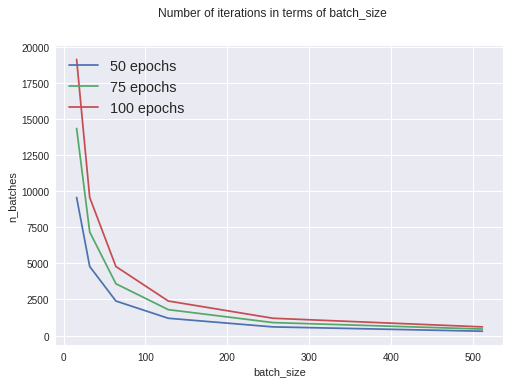

In [0]:
# Iterations required
batch_list = np.array([32,64,128,256,512])
#plt.figsize=(22,6)
plt.suptitle('Number of iterations in terms of batch_size')
plt.plot(batch_list,50*len(X_train)/batch_list,label='50 epochs')
plt.plot(batch_list,75*len(X_train)/batch_list,label='75 epochs')
plt.plot(batch_list,100*len(X_train)/batch_list,label='100 epochs')
plt.xlabel('batch_size')
plt.ylabel('n_batches')
plt.legend(loc='upper left', fontsize='x-large')
plt.show()

## RNN Cell

In [0]:
#training RNN 
n_hidden = 128
net_RNN = RNN_net(n_letters, n_hidden, n_languages)
results_dico_RNN, best_model_dico_RNN = train_setup(net_RNN, lr=0.15, n_batches=300, batch_size = 512, display_freq=None) # CPU Training example

Nb epochs :  60


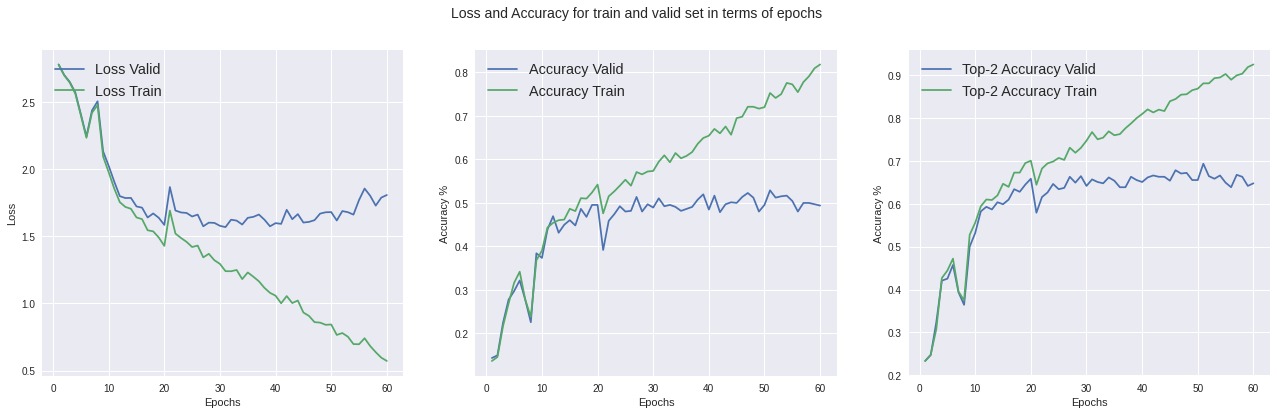

In [0]:
# Plot Top2
Plot_NN_Top2(results_dico_RNN)

In [0]:
#Print Dico
Print_NN(best_model_dico_RNN)

> Best Model Dict:
epoch  :	 51
loss_train  :	 0.7658887115213527
loss_valid  :	 1.6179533603989311
accuracy_train  :	 0.752856676460986
accuracy_valid  :	 0.5289634146341463
> Model's state_dict:
rnn_cell.weight_ih_l0 	 torch.Size([128, 55])
rnn_cell.weight_hh_l0 	 torch.Size([128, 128])
rnn_cell.bias_ih_l0 	 torch.Size([128])
rnn_cell.bias_hh_l0 	 torch.Size([128])
h20.weight 	 torch.Size([18, 128])
h20.bias 	 torch.Size([18])
> Optimizer's state_dict:
state
param_groups


## LSTM cell

In [0]:
class LSTM_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM_net, self).__init__()
        self.hidden_size = hidden_size
        self.lstm_cell = nn.LSTM(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, input, hidden = None):
        out, hidden = self.lstm_cell(input, hidden)
        output = self.h2o(hidden[0].view(-1, self.hidden_size))
        output = self.softmax(output)
        return output, hidden
    
    def init_hidden(self, batch_size = 1):
        return (torch.zeros(1, batch_size, self.hidden_size), torch.zeros(1, batch_size, self.hidden_size))

In [0]:
# Train LSTM
n_hidden = 128
net_LSTM = LSTM_net(n_letters, n_hidden, n_languages)
results_dico_LSTM, best_model_dico_LSTM = train_setup(net_LSTM, lr=0.15, n_batches=300, batch_size = 512, display_freq=None, device = device_gpu)

Nb epochs :  60


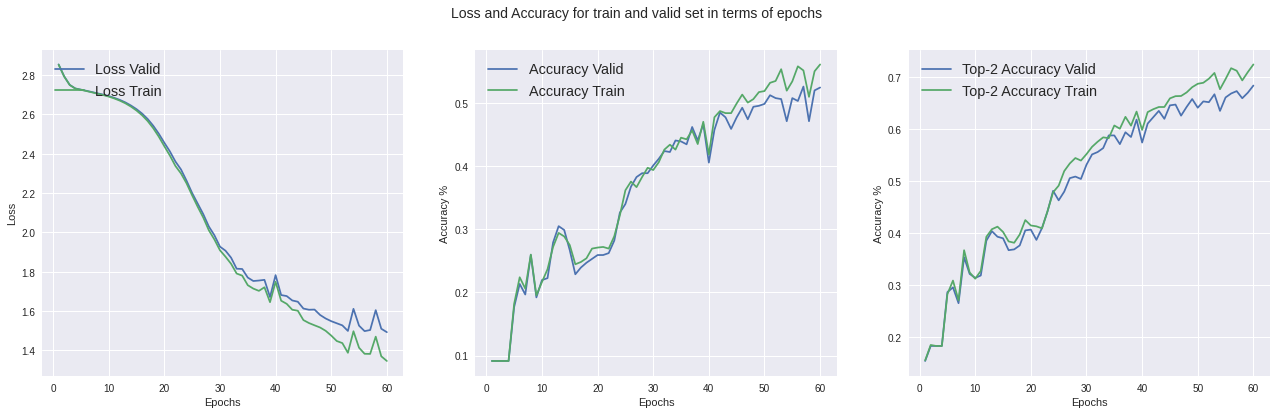

In [0]:
# Plot Top2
Plot_NN_Top2(results_dico_LSTM)

In [0]:
# Print Dico
Print_NN(best_model_dico_LSTM)

> Best Model Dict:
epoch  :	 57
loss_train  :	 1.3826149565341341
loss_valid  :	 1.504093907211294
accuracy_train  :	 0.5514201762977473
accuracy_valid  :	 0.5259146341463414
> Model's state_dict:
lstm_cell.weight_ih_l0 	 torch.Size([512, 55])
lstm_cell.weight_hh_l0 	 torch.Size([512, 128])
lstm_cell.bias_ih_l0 	 torch.Size([512])
lstm_cell.bias_hh_l0 	 torch.Size([512])
h2o.weight 	 torch.Size([18, 128])
h2o.bias 	 torch.Size([18])
> Optimizer's state_dict:
state
param_groups


## GRU Cell

In [0]:
class GRU_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU_net, self).__init__()
        self.hidden_size = hidden_size
        self.gru_cell = nn.GRU(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, input, hidden = None):
        out, hidden = self.gru_cell(input, hidden)
        output = self.h2o(hidden.view(-1, self.hidden_size))
        output = self.softmax(output)
        return output, hidden

In [0]:
# Train GRU
n_hidden = 128
net_GRU = GRU_net(n_letters, n_hidden, n_languages)
results_dico_GRU, best_model_dico_GRU = train_setup(net_GRU, lr=0.15, n_batches=500, batch_size = 512, display_freq=None, device = device_gpu)

Nb epochs :  83


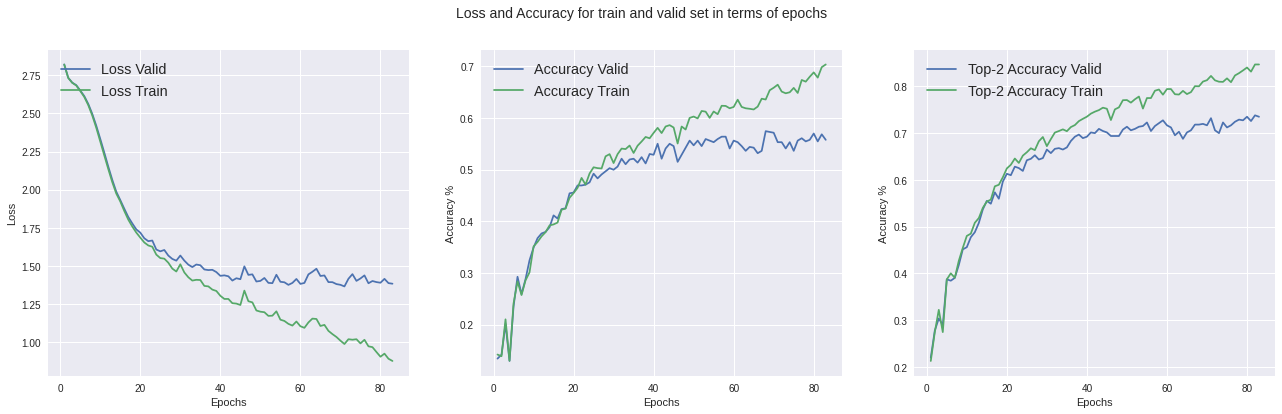

In [0]:
# Plot Top2
Plot_NN_Top2(results_dico_GRU)

In [0]:
# Print Dico
Print_NN(best_model_dico_GRU)

> Best Model Dict:
epoch  :	 68
loss_train  :	 1.0535070167082337
loss_valid  :	 1.3938296409767468
accuracy_train  :	 0.6359777995429318
accuracy_valid  :	 0.5746951219512195
> Model's state_dict:
gru_cell.weight_ih_l0 	 torch.Size([384, 55])
gru_cell.weight_hh_l0 	 torch.Size([384, 128])
gru_cell.bias_ih_l0 	 torch.Size([384])
gru_cell.bias_hh_l0 	 torch.Size([384])
h2o.weight 	 torch.Size([18, 128])
h2o.bias 	 torch.Size([18])
> Optimizer's state_dict:
state
param_groups


## Saving / Loading

### Saving Results / Models

In [0]:
# This Session -> Colab
# Save Results
np.save(data_path_+'results_dico_RNN.npy', results_dico_RNN)
np.save(data_path_+'results_dico_LSTM.npy', results_dico_LSTM)
np.save(data_path_+'results_dico_GRU.npy', results_dico_GRU)
# Save Best Models Dico
np.save(data_path_+'best_model_dico_RNN.npy', best_model_dico_RNN)
np.save(data_path_+'best_model_dico_LSTM.npy', best_model_dico_LSTM)
np.save(data_path_+'best_model_dico_GRU.npy', best_model_dico_GRU)
# Models Parameters
torch.save(best_model_dico_RNN['model_state_dict'], data_path_+'best_model_RNN.pth')
torch.save(best_model_dico_LSTM['model_state_dict'], data_path_+'best_model_LSTM.pth')
torch.save(best_model_dico_GRU['model_state_dict'], data_path_+'best_model_GRU.pth')

In [0]:
# Colab -> PC
# Save Results
#files.download('results_dico_rnn.npy')
#files.download('results_dico_LSTM.npy')
#files.download('results_dico_GRU.npy')
# Save Best Models Dico
#files.download('best_model_dico_rnn.npy')
#files.download('best_model_dico_LSTM.npy')
#files.download('best_model_dico_GRU.npy')

### Loading Results / Models

In [0]:
# Colab -> This Session
# Load Results 
results_dico_RNN = np.load(data_path_+'results_dico_RNN.npy',allow_pickle='TRUE').item()
results_dico_LSTM = np.load(data_path_+'results_dico_LSTM.npy',allow_pickle='TRUE').item()
results_dico_GRU = np.load(data_path_+'results_dico_GRU.npy',allow_pickle='TRUE').item()
# Load Best Models 
best_model_dico_RNN = np.load(data_path_+'best_model_dico_RNN.npy',allow_pickle='TRUE').item()
best_model_dico_LSTM = np.load(data_path_+'best_model_dico_LSTM.npy',allow_pickle='TRUE').item()
best_model_dico_GRU = np.load(data_path_+'best_model_dico_GRU.npy',allow_pickle='TRUE').item()

In [0]:
# Create NN from saved Models Parameters
# RNN
n_hidden = 128
net_best_RNN = RNN_net(n_letters, n_hidden, n_languages)
net_best_RNN.load_state_dict(torch.load(data_path_+'best_model_RNN.pth'))
net_best_RNN.eval()
print(net_best_RNN)
# LSTM
n_hidden = 128
net_best_LSTM = LSTM_net(n_letters, n_hidden, n_languages)
net_best_LSTM.load_state_dict(torch.load(data_path_+'best_model_LSTM.pth'))
net_best_LSTM.eval()
print(net_best_LSTM)
# GRU
n_hidden = 128
net_best_GRU = GRU_net(n_letters, n_hidden, n_languages)
net_best_GRU.load_state_dict(torch.load(data_path_+'best_model_GRU.pth'))
net_best_GRU.eval()
print(net_best_GRU)

RNN_net(
  (rnn_cell): RNN(55, 128)
  (h20): Linear(in_features=128, out_features=18, bias=True)
  (softmax): LogSoftmax()
)
LSTM_net(
  (lstm_cell): LSTM(55, 128)
  (h2o): Linear(in_features=128, out_features=18, bias=True)
  (softmax): LogSoftmax()
)
GRU_net(
  (gru_cell): GRU(55, 128)
  (h2o): Linear(in_features=128, out_features=18, bias=True)
  (softmax): LogSoftmax()
)


# 2) - Same Parameters Numbers

Les modeles precedents n'avaient pas le mm nombre param.

In [0]:
print(f'The RNN model has {count_parameters(net_best_RNN):,} trainable parameters')
print(f'The LSTM model has {count_parameters(net_best_LSTM):,} trainable parameters')
print(f'The GRU model has {count_parameters(net_best_GRU):,} trainable parameters')

The RNN model has 26,002 trainable parameters
The LSTM model has 97,042 trainable parameters
The GRU model has 73,362 trainable parameters


## Training

In [0]:
n_hidden_list = range(1,260,4)
para_RNN, para_LSTM, para_GRU = [],[],[]
for n_hidden in n_hidden_list :
  net_RNN_2 = RNN_net(n_letters, n_hidden, n_languages)
  net_LSTM_2 = LSTM_net(n_letters, n_hidden, n_languages)
  net_GRU_2 = GRU_net(n_letters, n_hidden, n_languages)
  para_RNN.append(count_parameters(net_RNN_2))
  para_LSTM.append(count_parameters(net_LSTM_2))
  para_GRU.append(count_parameters(net_GRU_2))

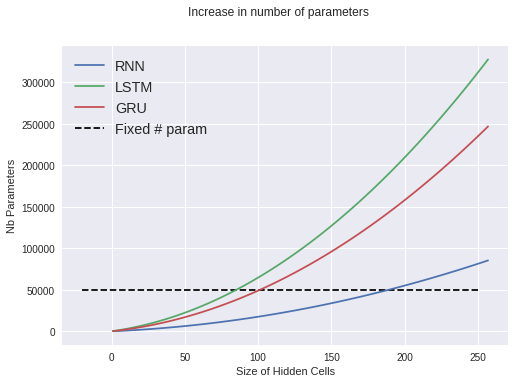

In [0]:
#plt.figsize=(22,6)
plt.suptitle('Increase in number of parameters')
plt.plot(n_hidden_list, para_RNN,label='RNN')
plt.plot(n_hidden_list, para_LSTM,label='LSTM')
plt.plot(n_hidden_list, para_GRU,label='GRU')
plt.hlines(50000,-20,250,colors='k',linestyles='dashed', label='Fixed # param')
plt.xlabel('Size of Hidden Cells')
plt.ylabel('Nb Parameters')
plt.legend(loc='upper left', fontsize='x-large')
plt.show()

In [0]:
# Creating Models with same nb parameters : 50 000
net_RNN2 = RNN_net(n_letters, 189, n_languages)   # RNN     n_hidden 189   nb para 49,914
net_LSTM2 = LSTM_net(n_letters, 85, n_languages)  # LSTM    n_hidden 85    nb para 49,828
net_GRU2 = GRU_net(n_letters, 101, n_languages)   # GRU     n_hidden 101   nb para 49,710

In [0]:
print(f'The RNN model has {count_parameters(net_RNN2):,} trainable parameters')
print(f'The LSTM model has {count_parameters(net_LSTM2):,} trainable parameters')
print(f'The GRU model has {count_parameters(net_GRU2):,} trainable parameters')

The RNN model has 49,914 trainable parameters
The LSTM model has 49,828 trainable parameters
The GRU model has 49,710 trainable parameters


In [0]:
# Training
results_dico_RNN2, best_model_dico_RNN2 = train_setup(net_RNN2, lr=0.1, n_batches=2000, batch_size = 512, display_freq=None)
results_dico_LSTM2, best_model_dico_LSTM2 = train_setup(net_LSTM2, lr=0.1, n_batches=2000, batch_size = 512, display_freq=None)
results_dico_GRU2, best_model_dico_GRU2 = train_setup(net_GRU2, lr=0.1, n_batches=2000, batch_size = 512, display_freq=None)

In [0]:
# Plot Top2
Plot_NN_Top2(results_dico_RNN2)

In [0]:
# Plot Top2
Plot_NN_Top2(results_dico_LSTM2)

In [0]:
# Plot Top2
Plot_NN_Top2(results_dico_GRU2)

In [0]:
#Print Dico
Print_NN(best_model_dico_RNN2)
Print_NN(best_model_dico_LSTM2)
Print_NN(best_model_dico_GRU2)

## Saving / Loading

### Saving Results / Models

In [0]:
# This Session -> Colab
# Save Results
np.save(data_path_+'results_dico_RNN2.npy', results_dico_RNN2)
np.save(data_path_+'results_dico_LSTM2.npy', results_dico_LSTM2)
np.save(data_path_+'results_dico_GRU2.npy', results_dico_GRU2)
# Save Best Models Dico
np.save(data_path_+'best_model_dico_RNN2.npy', best_model_dico_RNN2)
np.save(data_path_+'best_model_dico_LSTM2.npy', best_model_dico_LSTM2)
np.save(data_path_+'best_model_dico_GRU2.npy', best_model_dico_GRU2)
# Models Parameters
torch.save(best_model_dico_RNN2['model_state_dict'], data_path_+'best_model_RNN2.pth')
torch.save(best_model_dico_LSTM2['model_state_dict'], data_path_+'best_model_LSTM2.pth')
torch.save(best_model_dico_GRU2['model_state_dict'], data_path_+'best_model_GRU2.pth')

### Loading Results / Models

In [0]:
# Colab -> This Session
# Load Results 
results_dico_RNN2 = np.load(data_path_+'results_dico_RNN2.npy',allow_pickle='TRUE').item()
results_dico_LSTM2 = np.load(data_path_+'results_dico_LSTM2.npy',allow_pickle='TRUE').item()
results_dico_GRU2 = np.load(data_path_+'results_dico_GRU2.npy',allow_pickle='TRUE').item()
# Load Best Models 
best_model_dico_RNN2 = np.load(data_path_+'best_model_dico_RNN2.npy',allow_pickle='TRUE').item()
best_model_dico_LSTM2 = np.load(data_path_+'best_model_dico_LSTM2.npy',allow_pickle='TRUE').item()
best_model_dico_GRU2 = np.load(data_path_+'best_model_dico_GRU2.npy',allow_pickle='TRUE').item()

In [0]:
# Create NN from saved Models Parameters
# RNN
n_hidden = 189
net_best_RNN2 = RNN_net(n_letters, n_hidden, n_languages)
net_best_RNN2.load_state_dict(torch.load(data_path_+'best_model_RNN2.pth'))
net_best_RNN2.eval()
print(net_best_RNN2)
# LSTM
n_hidden = 85
net_best_LSTM2 = LSTM_net(n_letters, n_hidden, n_languages)
net_best_LSTM2.load_state_dict(torch.load(data_path_+'best_model_LSTM2.pth'))
net_best_LSTM2.eval()
print(net_best_LSTM2)
# GRU
n_hidden = 101
net_best_GRU2 = GRU_net(n_letters, n_hidden, n_languages)
net_best_GRU2.load_state_dict(torch.load(data_path_+'best_model_GRU2.pth'))
net_best_GRU2.eval()
print(net_best_GRU2)

RNN_net(
  (rnn_cell): RNN(55, 189)
  (h20): Linear(in_features=189, out_features=18, bias=True)
  (softmax): LogSoftmax()
)
LSTM_net(
  (lstm_cell): LSTM(55, 85)
  (h2o): Linear(in_features=85, out_features=18, bias=True)
  (softmax): LogSoftmax()
)
GRU_net(
  (gru_cell): GRU(55, 101)
  (h2o): Linear(in_features=101, out_features=18, bias=True)
  (softmax): LogSoftmax()
)


#3) - Comparaisons Modèles

## Computing Time
We measure times required to train the different types of models with the same number of parameters (about 50,000 parameters). We train them for the optimal number of epochs we found previously by early stopping ; the number of epochs for which we obtained the best accuracies on valid set.
To find the corresponding number of iterations ($n\_batches$), we do
$n\_batches = \frac{n\_epochs~*~len(X\_train) }{b\_size}$

In [0]:
# n_batches of best_models2
round(29*len(X_train)/512),round(63*len(X_train)/512),round(54*len(X_train)/512)

(795, 1727, 1480)

In [0]:
# Creating Models with same nb parameters : 50 000
net_RNN2 = RNN_net(n_letters, 189, n_languages)   # RNN     n_hidden 189   nb para 49,914
net_LSTM2 = LSTM_net(n_letters, 85, n_languages)  # LSTM    n_hidden 85    nb para 49,828
net_GRU2 = GRU_net(n_letters, 101, n_languages)   # GRU     n_hidden 101   nb para 49,710

In [0]:
import time
# Df to save times
Training_times = pd.DataFrame(data={'Name': ['best_RNN2','best_LSTM2','best_GRU2'],'Train_Time(s)':np.nan,})

In [0]:
# Training Time
# RNN
dtime=time.clock()
train_setup(net_RNN2, lr=0.15, n_batches=795, batch_size = 512, display_freq=None)
dtime=time.clock()-dtime
Training_times.iloc[0,1]=round(dtime)
# LSTM
dtime=time.clock()
train_setup(net_LSTM2, lr=0.15, n_batches=1727, batch_size = 512, display_freq=None)
dtime=time.clock()-dtime
Training_times.iloc[1,1]=round(dtime)
# GRU
dtime=time.clock()
train_setup(net_GRU2, lr=0.15, n_batches=1480, batch_size = 512, display_freq=None)
dtime=time.clock()-dtime
Training_times.iloc[2,1]=round(dtime)

In [0]:
# Training Times (s)
Training_times

,Name,Train_Time(s)
0,best_RNN2,620.0
1,best_LSTM2,1760.0
2,best_GRU2,1439.0


## Graphiques Loss et Accuracy

Nb epochs RNN :  60 Nb epochs LSTM :  60 Nb epochs GRU :  83


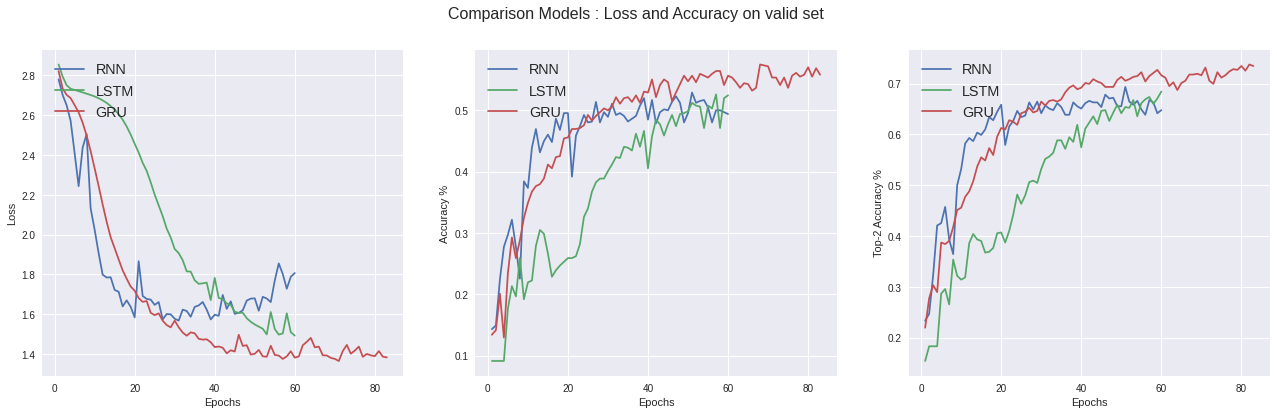

In [0]:
# Taille hidden cells FIXE : n_hidden = 128 
Plot_NN_Top2_Comparaison(results_dico_RNN,results_dico_LSTM,results_dico_GRU)

In [0]:
# Nombre parameters FIXE : environ = 50,000 
Plot_NN_Top2_Comparaison(results_dico_RNN2,results_dico_LSTM2,results_dico_GRU2)

## Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

def matrix_confusion(net, X_, y_):
  predict_label_list = []
  true_label_list = []
  data_ = dataloader(len(X_), X_, y_) # load tout le dataset

  # Fill the matrix : lignes = true_label, colonne = predicted_label
  with torch.no_grad(): 
    for name, language, name_ohe, lang_rep in data_: # charge chaque ligne
      output = infer(net, name, device_gpu)
      val, indice = output.topk(1)
      predict_label_list.append(indice.item())
      true_label_list.append(lang_rep.item())

  cm=confusion_matrix(true_label_list,predict_label_list)
  cm.dtype = float
  # Normalize by dividing every row by its sum
  for i in range(n_languages):
      cm[i] = 100*np.round(cm[i] / cm[i].sum(),2)
  plt.figure(figsize =(12,7))
  sn.heatmap(cm,annot=True, xticklabels=languages, yticklabels=languages)
  plt.xlabel('Predicted')
  plt.ylabel('Real target')

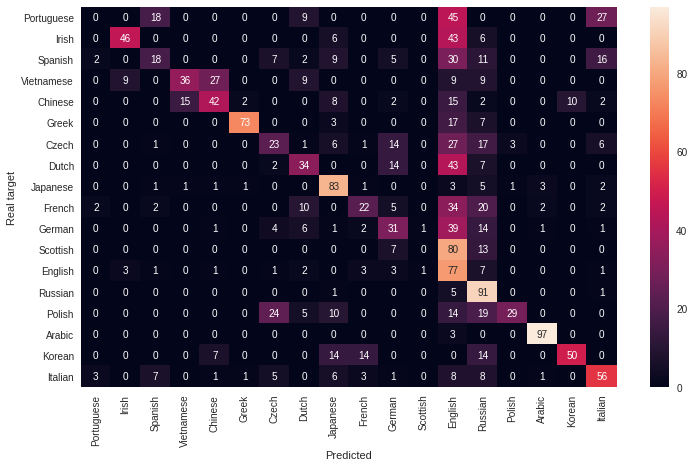

In [0]:
matrix_confusion(net_best_RNN2,X_test,y_test)

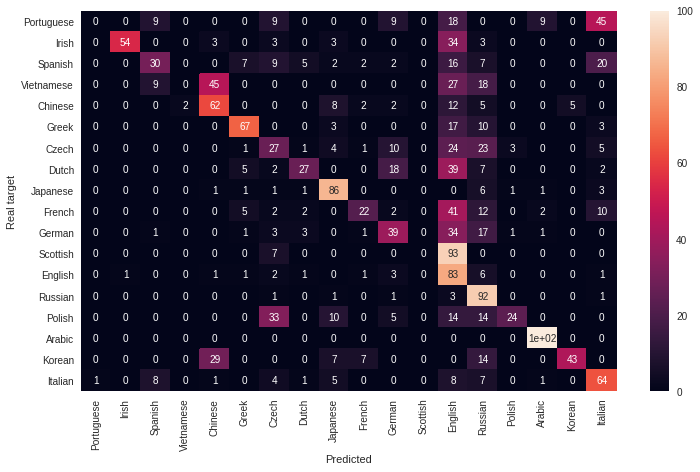

In [0]:
matrix_confusion(net_best_LSTM2,X_test,y_test)

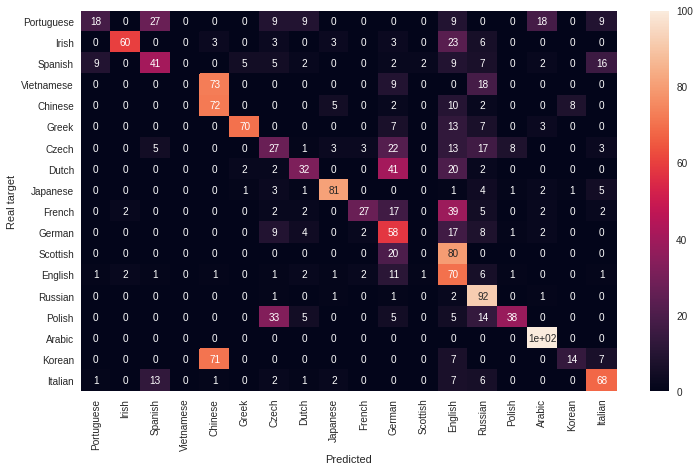

In [0]:
matrix_confusion(net_best_GRU2,X_test,y_test)

On voit que les colonnes English et Russe sont très souvent prédites, trop souvent. Cela doit venir du fait que le dataset n'est pas équilibré aux de la répartition des labels. En effet, on voit dans l'histogramme que les noms russes et anglais sont bien plus représentés que les autres, on parle d'un facteur qui va de 6 (English par rapport à German ) jusqu'à 45 fois plus (Russian par rapport à French).
Il est évident que cette surreprésentation très marquée influe sur l'apprentissage ; et le NN va avoir tendance à prédire plus souvent ces classes.

## Precision Test Set and Tableau recap

In [0]:
tableau = pd.DataFrame(data={'Name': ['Nan'], 'Size_Hidden': ['Nan'],'Nb_param': ['Nan'],'Train Time(s)': ['Nan'],'Acc Train Set':['Nan'],'Acc Valid Set':['Nan'],
                             'Acc Test Set':['Nan'],'Top2 Acc Test':['Nan'],'Top3 Acc Test':['Nan']})

In [0]:
# Filling Table
tableau.loc[0,:]=['best_RNN',128,count_parameters(net_best_RNN),'_',eval(net_best_RNN, len(X_train), 1, X_train, y_train)[0],
                  eval(net_best_RNN, len(X_valid), 1, X_valid, y_valid)[0],eval(net_best_RNN, len(X_test), 1, X_test, y_test)[0]]
tableau.loc[1,:]=['best_LSTM',128,count_parameters(net_best_LSTM),'_',eval(net_best_LSTM, len(X_train), 1, X_train, y_train)[0],
                  eval(net_best_LSTM, len(X_valid), 1, X_valid, y_valid)[0],eval(net_best_LSTM, len(X_test), 1, X_test, y_test)[0]]
tableau.loc[2,:]=['best_GRU',128,count_parameters(net_best_GRU),'_',eval(net_best_GRU, len(X_train), 1, X_train, y_train)[0],
                  eval(net_best_GRU, len(X_valid), 1, X_valid, y_valid)[0],eval(net_best_GRU, len(X_test), 1, X_test, y_test)[0]]
tableau.loc[3,:]=['best_RNN2',189,count_parameters(net_best_RNN2),'_',eval(net_best_RNN2, len(X_train), 1, X_train, y_train)[0],
                  eval(net_best_RNN2, len(X_valid), 1, X_valid, y_valid)[0],eval(net_best_RNN2, len(X_test), 1, X_test, y_test)[0]]
tableau.loc[4,:]=['best_LSTM2',85,count_parameters(net_best_LSTM2),'_',eval(net_best_LSTM2, len(X_train), 1, X_train, y_train)[0],
                  eval(net_best_LSTM2, len(X_valid), 1, X_valid, y_valid)[0],eval(net_best_LSTM2, len(X_test), 1, X_test, y_test)[0]]
tableau.loc[5,:]=['best_GRU2',101,count_parameters(net_best_GRU2),'_',eval(net_best_GRU2, len(X_train), 1, X_train, y_train)[0],
                  eval(net_best_GRU2, len(X_valid), 1, X_valid, y_valid)[0],eval(net_best_GRU2, len(X_test), 1, X_test, y_test)[0]]
tableau['Top2 Acc Test']=[eval(net_best_RNN, len(X_test), 2, X_test, y_test)[0],eval(net_best_LSTM, len(X_test), 2, X_test, y_test)[0],eval(net_best_GRU, len(X_test), 2, X_test, y_test)[0],
                           eval(net_best_RNN2, len(X_test), 2, X_test, y_test)[0],eval(net_best_LSTM2, len(X_test), 2, X_test, y_test)[0],eval(net_best_GRU2, len(X_test), 2, X_test, y_test)[0]]
tableau['Top3 Acc Test']=[eval(net_best_RNN, len(X_test), 3, X_test, y_test)[0],eval(net_best_LSTM, len(X_test), 3, X_test, y_test)[0],eval(net_best_GRU, len(X_test), 3, X_test, y_test)[0],
                           eval(net_best_RNN2, len(X_test), 3, X_test, y_test)[0],eval(net_best_LSTM2, len(X_test), 3, X_test, y_test)[0],eval(net_best_GRU2, len(X_test), 3, X_test, y_test)[0]]
# Rounding
tableau.iloc[:,4:9] = 100*tableau.iloc[:,4:9]
tableau.iloc[:,4:9]=tableau.iloc[:,4:9].astype('float').round(1)

In [0]:
# Filling Computing times
tableau.iloc[3:,3]=Training_times['Train_Time(s)'].to_list()

In [0]:
tableau

# 4) Hyperparameters

## Grid Search

### RNN
Accuracies

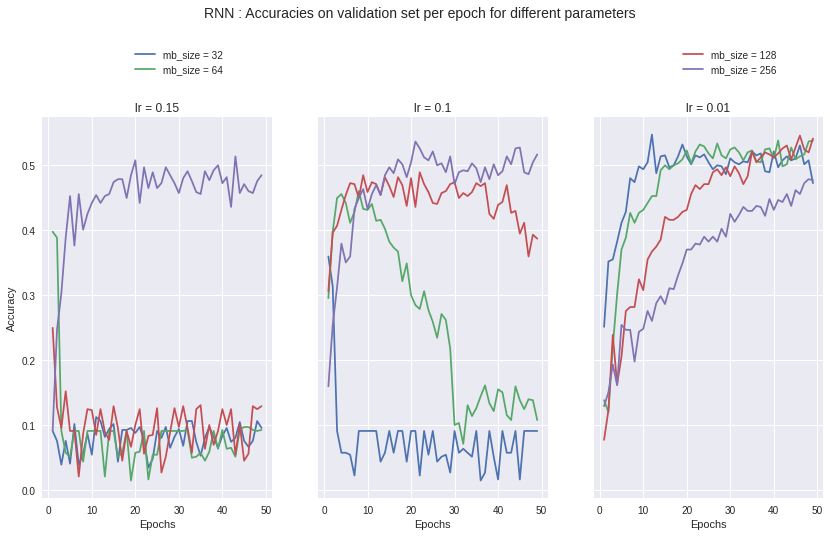

In [0]:
# RNN     n_hidden 189   nb para 49,914
# Grille des valeurs des paramètres à tester
lrs = [0.15, 0.1, 0.01]
mb_sizes = [32, 64, 128, 256]
nb_epochs = 50

results_dico_list_RNN = []    # Liste des results_dico
best_model_dico_list_RNN = [] # Liste des best models

f, ax = plt.subplots(1, len(lrs), sharey=True,figsize=(14,7))
f.suptitle('RNN : Accuracies on validation set per epoch for different parameters', fontsize=14, y = 1.1)

i = 0

for lr in lrs:
  ind_mb=0
  for mb_size in mb_sizes:
    net_grid_RNN = RNN_net(n_letters, 189, n_languages)
    # Training
    results_dico_grid_RNN, best_model_dico_grid_RNN =\
    train_setup(net_grid_RNN, lr=lr, n_batches=int(np.ceil(nb_epochs*len(X_train)/mb_size)), batch_size = mb_size,printer=False)
    # Save results
    results_dico_list_RNN.append(results_dico_grid_RNN)
    best_model_dico_list_RNN.append(best_model_dico_grid_RNN)
    # Plot
    nb_epochs_true =len(results_dico_grid_RNN['accur_top1_valid'])
    if i == 0:
      ax[i].plot(np.arange(1,nb_epochs_true+1),results_dico_grid_RNN['accur_top1_valid'], label = ("mb_size = " + str(mb_size)))
      ax[i].legend(bbox_to_anchor=(0.3, 1.05, 3, 0.1), loc=3,
              ncol=2, mode="expand", borderaxespad=2.)
      ax[i].set_ylabel('Accuracy')      
    else:
      ax[i].plot(np.arange(1,nb_epochs_true+1),results_dico_grid_RNN['accur_top1_valid'])
    ind_mb+=1
  ax[i].set_title("lr = " + str(lr))
  ax[i].set_xlabel('Epochs')
  i += 1

plt.show()

Courbes Loss

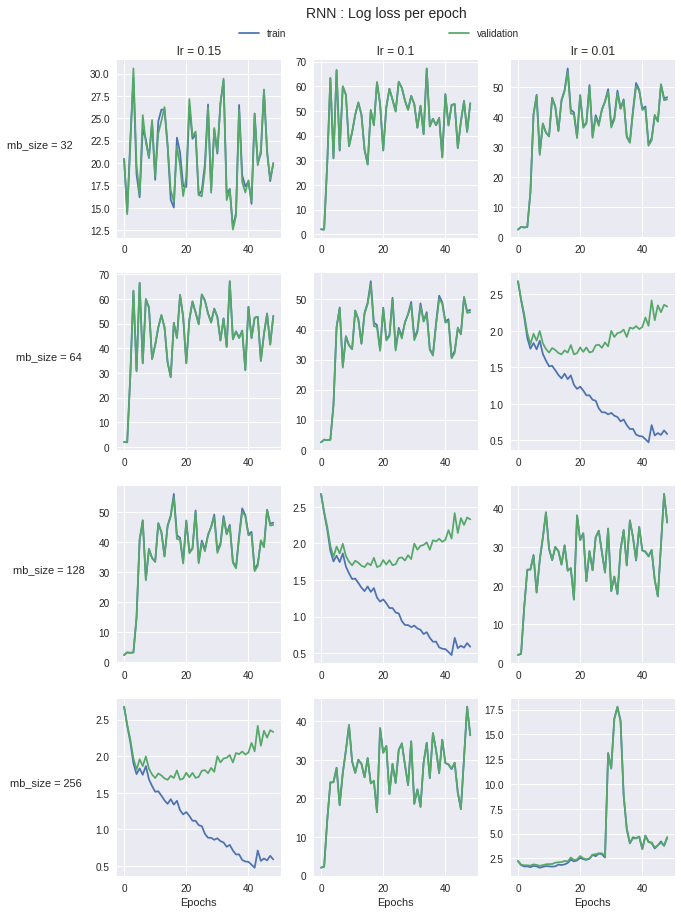

In [0]:
f, ax = plt.subplots(len(mb_sizes), len(lrs),figsize=(10,15))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.5, hspace=2)
f.suptitle('RNN : Log loss per epoch', fontsize=14, y = 0.93)

i = 0

for i in range(len(lrs)):
  for j in range(len(mb_sizes)):
    # Retrieve corresponding results
    results_dico_grid_RNN = results_dico_list_RNN[i+j]
    lt = results_dico_grid_RNN['losses_train']
    lv = results_dico_grid_RNN['losses_valid']

    if i == 0 and j == 0:
      ax[j,i].plot(lt, label = ("train"))
      ax[j,i].legend(bbox_to_anchor=(0.6, 0.99, 2., .102), loc=3,
             ncol=2, mode="expand", borderaxespad=2.)
      ax[j,i].plot(lv, label = ("validation"))
      ax[j,i].legend(bbox_to_anchor=(0.6, 0.99, 2., .102), loc=3,
             ncol=2, mode="expand", borderaxespad=2.)
    else:
      ax[j,i].plot(lt)
      ax[j,i].plot(lv)
      
    if i == 0:
      ax[j,i].set_ylabel('mb_size = ' + str(mb_sizes[j]),rotation="horizontal",labelpad=50)
      
    if j == 0:
      ax[j,i].set_title('lr = ' + str(lrs[i]))
      
  ax[j,i].set_xlabel('Epochs')
   
plt.show()

### LSTM
Accuracies

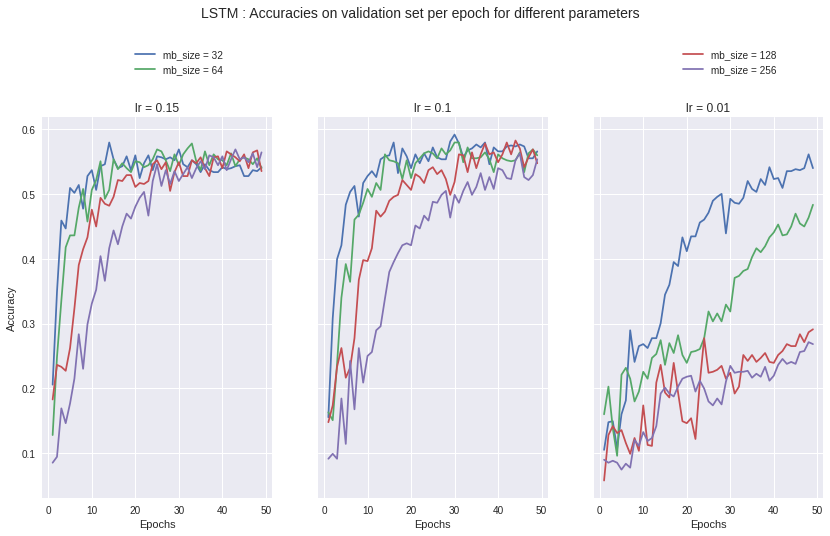

In [0]:
# LSTM    n_hidden 85    nb para 49,828

# Grille des valeurs des paramètres à tester
lrs = [ 0.15, 0.1, 0.01]
mb_sizes = [32, 64, 128, 256]
nb_epochs = 50

results_dico_list_LSTM = []    # Liste des results_dico
best_model_dico_list_LSTM = [] # Liste des best models

f, ax = plt.subplots(1, len(lrs), sharey=True,figsize=(14,7))
f.suptitle('LSTM : Accuracies on validation set per epoch for different parameters', fontsize=14, y = 1.1)

i = 0

for lr in lrs:
  ind_mb=0
  for mb_size in mb_sizes:
    net_grid_LSTM = LSTM_net(n_letters, 85, n_languages)  
    # Training
    results_dico_grid_LSTM, best_model_dico_grid_LSTM =\
    train_setup(net_grid_LSTM, lr=lr, n_batches=int(np.ceil(nb_epochs*len(X_train)/mb_size)), batch_size = mb_size,printer=False)
    # Save results
    results_dico_list_LSTM.append(results_dico_grid_LSTM)
    best_model_dico_list_LSTM.append(best_model_dico_grid_LSTM)
    # Plot
    nb_epochs_true =len(results_dico_grid_LSTM['accur_top1_valid'])
    if i == 0:
      ax[i].plot(np.arange(1,nb_epochs_true+1),results_dico_grid_LSTM['accur_top1_valid'], label = ("mb_size = " + str(mb_size)))
      ax[i].legend(bbox_to_anchor=(0.3, 1.05, 3, 0.1), loc=3,
              ncol=2, mode="expand", borderaxespad=2.)
      ax[i].set_ylabel('Accuracy')      
    else:
      ax[i].plot(np.arange(1,nb_epochs_true+1),results_dico_grid_LSTM['accur_top1_valid'])
    ind_mb+=1
  ax[i].set_title("lr = " + str(lr))
  ax[i].set_xlabel('Epochs')
  i += 1

plt.show()

Courbes Loss

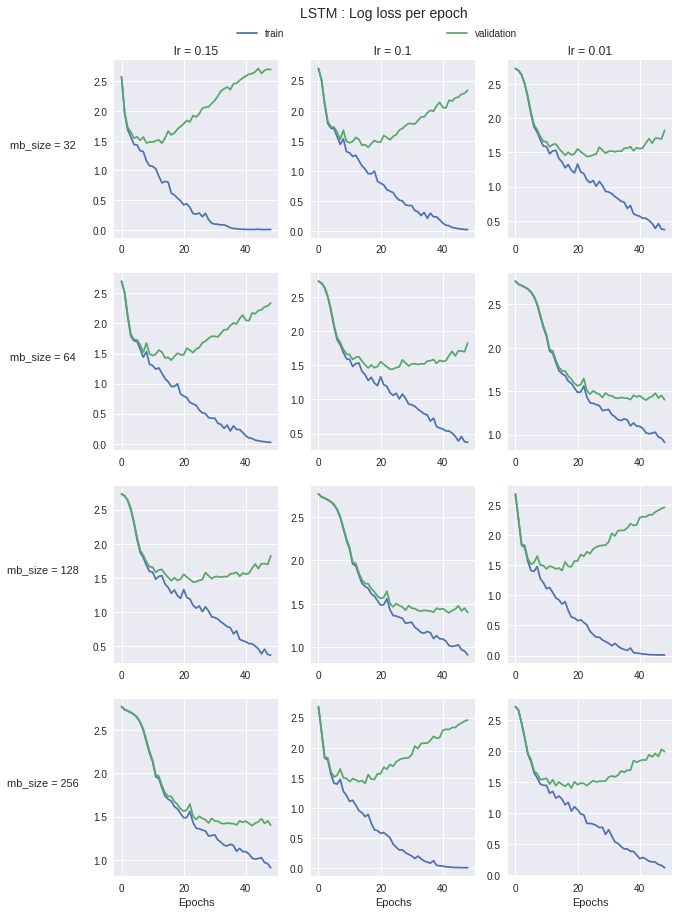

In [0]:
f, ax = plt.subplots(len(mb_sizes), len(lrs),figsize=(10,15))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.5, hspace=2)
f.suptitle('LSTM : Log loss per epoch', fontsize=14, y = 0.93)

i = 0

for i in range(len(lrs)):
  for j in range(len(mb_sizes)):
    # Retrieve corresponding results
    results_dico_grid_LSTM = results_dico_list_LSTM[i+j]
    lt = results_dico_grid_LSTM['losses_train']
    lv = results_dico_grid_LSTM['losses_valid']

    if i == 0 and j == 0:
      ax[j,i].plot(lt, label = ("train"))
      ax[j,i].legend(bbox_to_anchor=(0.6, 0.99, 2., .102), loc=3,
             ncol=2, mode="expand", borderaxespad=2.)
      ax[j,i].plot(lv, label = ("validation"))
      ax[j,i].legend(bbox_to_anchor=(0.6, 0.99, 2., .102), loc=3,
             ncol=2, mode="expand", borderaxespad=2.)
    else:
      ax[j,i].plot(lt)
      ax[j,i].plot(lv)
      
    if i == 0:
      ax[j,i].set_ylabel('mb_size = ' + str(mb_sizes[j]),rotation="horizontal",labelpad=50)
      
    if j == 0:
      ax[j,i].set_title('lr = ' + str(lrs[i]))
      
  ax[j,i].set_xlabel('Epochs')
   
plt.show()

### GRU
Accuracies

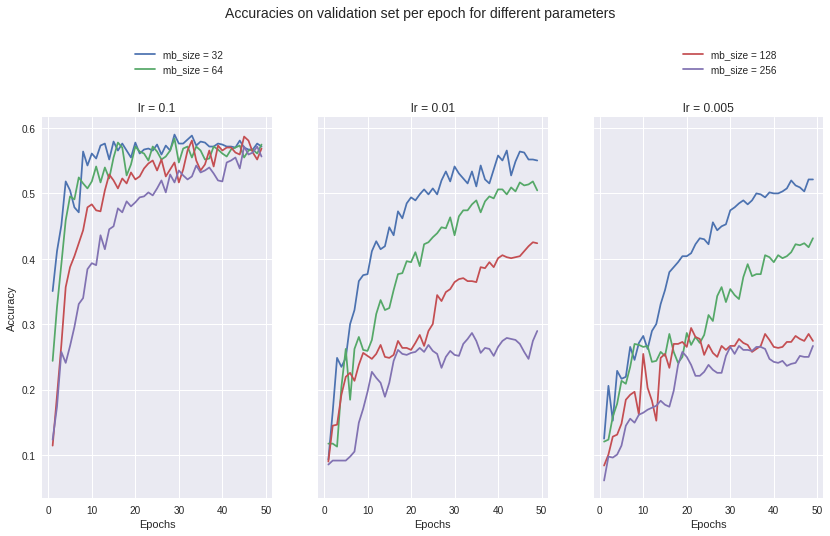

In [0]:
# GRU     n_hidden 101   nb para 49,710

# Grille des valeurs des paramètres à tester
lrs = [0.1, 0.01,0.005]
mb_sizes = [32, 64, 128, 256]
nb_epochs = 50

results_dico_list_GRU = []    # Liste des results_dico
best_model_dico_list_GRU = [] # Liste des best models

f, ax = plt.subplots(1, len(lrs), sharey=True,figsize=(14,7))
f.suptitle('Accuracies on validation set per epoch for different parameters', fontsize=14, y = 1.1)

i = 0

for lr in lrs:
  ind_mb=0
  for mb_size in mb_sizes:
    net_grid_GRU = GRU_net(n_letters, 101, n_languages)
    # Training
    results_dico_grid_GRU, best_model_dico_grid_GRU =\
    train_setup(net_grid_GRU, lr=lr, n_batches=int(np.ceil(nb_epochs*len(X_train)/mb_size)), batch_size = mb_size,printer=False)
    # Save results
    results_dico_list_GRU.append(results_dico_grid_GRU)
    best_model_dico_list_GRU.append(best_model_dico_grid_GRU)
    # Plot
    nb_epochs_true =len(results_dico_grid_GRU['accur_top1_valid'])
    if i == 0:
      ax[i].plot(np.arange(1,nb_epochs_true+1),results_dico_grid_GRU['accur_top1_valid'], label = ("mb_size = " + str(mb_size)))
      ax[i].legend(bbox_to_anchor=(0.3, 1.05, 3, 0.1), loc=3,
              ncol=2, mode="expand", borderaxespad=2.)
      ax[i].set_ylabel('Accuracy')      
    else:
      ax[i].plot(np.arange(1,nb_epochs_true+1),results_dico_grid_GRU['accur_top1_valid'])
    ind_mb+=1
  ax[i].set_title("lr = " + str(lr))
  ax[i].set_xlabel('Epochs')
  i += 1

plt.show()

Courbes Loss

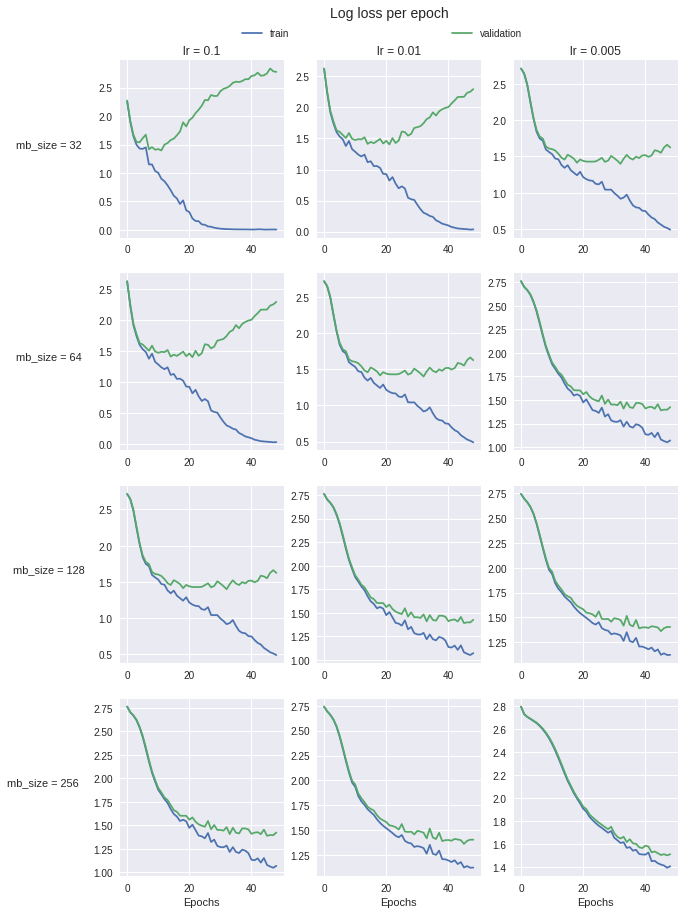

In [0]:
f, ax = plt.subplots(len(mb_sizes), len(lrs),figsize=(10,15))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.5, hspace=2)
f.suptitle('Log loss per epoch', fontsize=14, y = 0.93)

i = 0

for i in range(len(lrs)):
  for j in range(len(mb_sizes)):
    # Retrieve corresponding results
    results_dico_grid_GRU = results_dico_list_GRU[i+j]
    lt = results_dico_grid_GRU['losses_train']
    lv = results_dico_grid_GRU['losses_valid']

    if i == 0 and j == 0:
      ax[j,i].plot(lt, label = ("train"))
      ax[j,i].legend(bbox_to_anchor=(0.6, 0.99, 2., .102), loc=3,
             ncol=2, mode="expand", borderaxespad=2.)
      ax[j,i].plot(lv, label = ("validation"))
      ax[j,i].legend(bbox_to_anchor=(0.6, 0.99, 2., .102), loc=3,
             ncol=2, mode="expand", borderaxespad=2.)
    else:
      ax[j,i].plot(lt)
      ax[j,i].plot(lv)
      
    if i == 0:
      ax[j,i].set_ylabel('mb_size = ' + str(mb_sizes[j]),rotation="horizontal",labelpad=50)
      
    if j == 0:
      ax[j,i].set_title('lr = ' + str(lrs[i]))
      
  ax[j,i].set_xlabel('Epochs')
   
plt.show()

In [0]:
# Batch_size = 64
net_RNN5 = RNN_net(n_letters, 189, n_languages)   # RNN     n_hidden 189   nb para 49,914
net_LSTM5 = LSTM_net(n_letters, 85, n_languages)  # LSTM    n_hidden 85    nb para 49,828
net_GRU5 = GRU_net(n_letters, 101, n_languages)   # GRU     n_hidden 101   nb para 49,710
# Training
results_dico_RNN5, best_model_dico_RNN5 = train_setup(net_RNN5, lr=0.01, n_batches=3000, batch_size = 64, display_freq=None)
results_dico_LSTM5, best_model_dico_LSTM5 = train_setup(net_LSTM5, lr=0.01, n_batches=3000, batch_size = 64, display_freq=None)
results_dico_GRU5, best_model_dico_GRU5 = train_setup(net_GRU5, lr=0.01, n_batches=3000, batch_size = 64, display_freq=None)

Nb epochs RNN :  62 Nb epochs LSTM :  62 Nb epochs GRU :  62


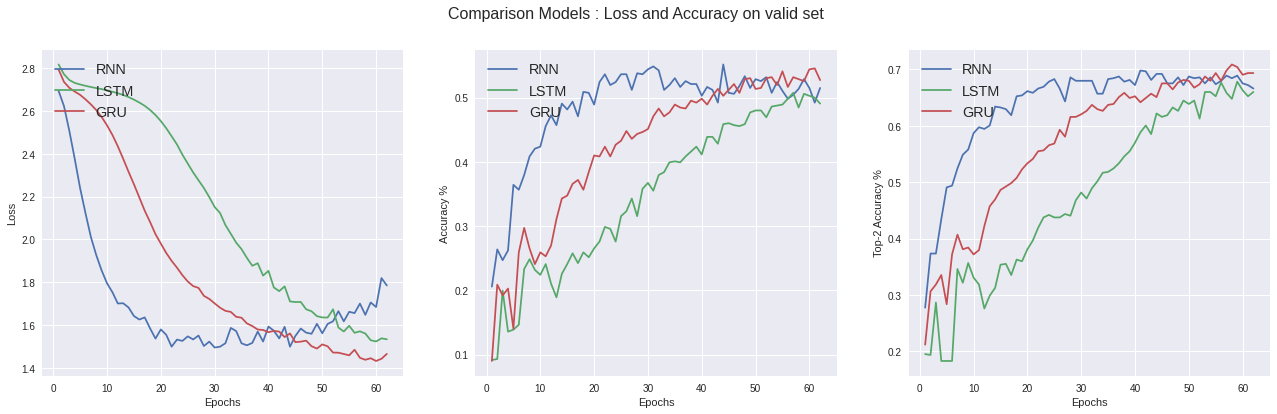

In [0]:
# Plot
Plot_NN_Top2_Comparaison(results_dico_RNN5,results_dico_LSTM5,results_dico_GRU5)

## Tries

batch_size = 256

In [0]:
# Batch_size = 256
net_RNN3 = RNN_net(n_letters, 189, n_languages)   # RNN     n_hidden 189   nb para 49,914
net_LSTM3 = LSTM_net(n_letters, 85, n_languages)  # LSTM    n_hidden 85    nb para 49,828
net_GRU3 = GRU_net(n_letters, 101, n_languages)   # GRU     n_hidden 101   nb para 49,710
# Training
results_dico_RNN3, best_model_dico_RNN3 = train_setup(net_RNN3, lr=0.1, n_batches=500, batch_size = 256, display_freq=None)
results_dico_LSTM3, best_model_dico_LSTM3 = train_setup(net_LSTM3, lr=0.1, n_batches=500, batch_size = 256, display_freq=None)
results_dico_GRU3, best_model_dico_GRU3 = train_setup(net_GRU3, lr=0.1, n_batches=500, batch_size = 256, display_freq=None)

Nb epochs RNN :  41 Nb epochs LSTM :  41 Nb epochs GRU :  41


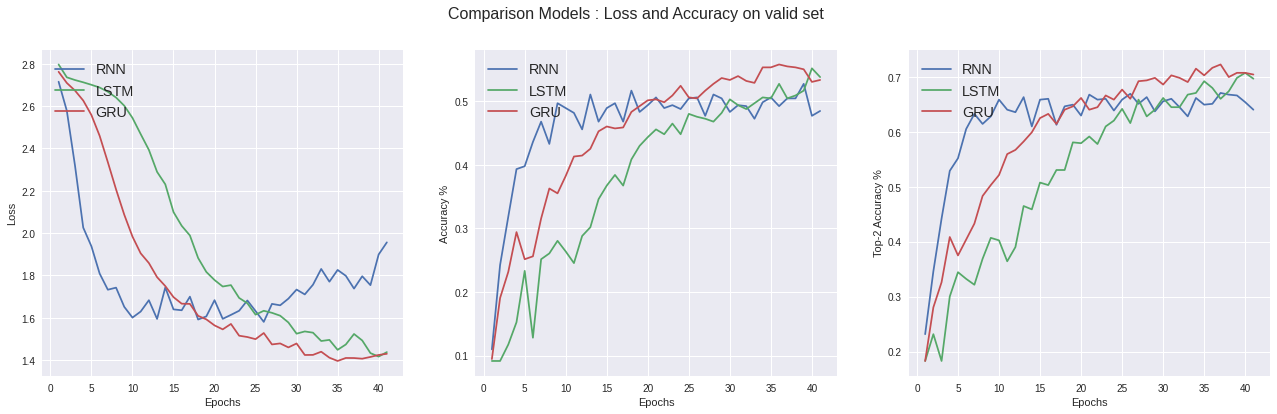

In [0]:
# Plot
Plot_NN_Top2_Comparaison(results_dico_RNN3,results_dico_LSTM3,results_dico_GRU3)

batch_size = 128

In [0]:
# Batch_size = 128
net_RNN4 = RNN_net(n_letters, 189, n_languages)   # RNN     n_hidden 189   nb para 49,914
net_LSTM4 = LSTM_net(n_letters, 85, n_languages)  # LSTM    n_hidden 85    nb para 49,828
net_GRU4 = GRU_net(n_letters, 101, n_languages)   # GRU     n_hidden 101   nb para 49,710
# Training
results_dico_RNN4, best_model_dico_RNN4 = train_setup(net_RNN4, lr=0.15, n_batches=4000, batch_size = 128, display_freq=None)
results_dico_LSTM4, best_model_dico_LSTM4 = train_setup(net_LSTM4, lr=0.15, n_batches=4000, batch_size = 128, display_freq=None)
results_dico_GRU4, best_model_dico_GRU4 = train_setup(net_GRU4, lr=0.15, n_batches=4000, batch_size = 128, display_freq=None)

Nb epochs RNN :  166 Nb epochs LSTM :  166 Nb epochs GRU :  166


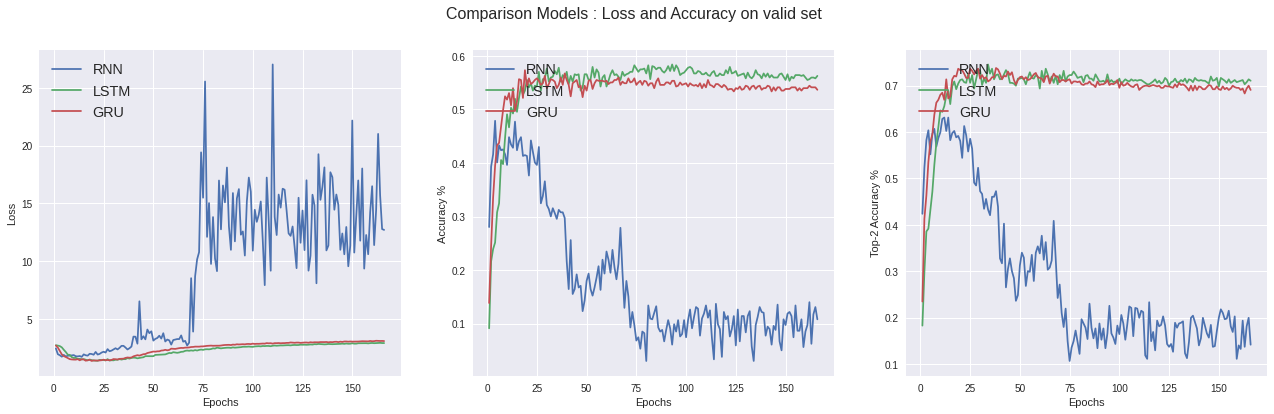

In [0]:
# Plot
Plot_NN_Top2_Comparaison(results_dico_RNN4,results_dico_LSTM4,results_dico_GRU4)

batch_size = 64

## Saving /Loading

### Saving Results / Models

In [0]:
# This Session -> Colab
# Save Results_grid
np.save(data_path_+'results_dico_grid_RNN.npy', results_dico_list_RNN)
np.save(data_path_+'results_dico_grid_LSTM.npy', results_dico_list_LSTM)
np.save(data_path_+'results_dico_grid_GRU.npy', results_dico_list_GRU)
# Save Best Models Dico_grid
np.save(data_path_+'best_model_dico_grid_RNN.npy', best_model_dico_list_RNN)
np.save(data_path_+'best_model_dico_grid_LSTM.npy', best_model_dico_list_LSTM)
np.save(data_path_+'best_model_dico_grid_GRU.npy', best_model_dico_list_GRU)

In [0]:
net_Waiting = RNN_net(n_letters, 128, n_languages)
results_Waiting, best_model_Waiting = train_setup(net_Waiting, lr=0.01, n_batches=3000, batch_size = 512, display_freq=None)
